# Import Libraries

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of gt_loaders.gen_gt failed: Traceback (most recent call last):
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_trai

In [26]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from net_trainer import NetworkTrainer, BaseModel

# Start Network Trainer

In [27]:
kwargs = { 
    'exp_params' : {
        'name': 'train_mobilenetv2',
        'description': 'Experimenting not to use ImageDataGenerator',
        'tags': ['mobilenetv2'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
        'tagger_model': OpenfaceMouth(),
        'dl_names': [DLName.FVC_PYBOSSA],
        'req': cts.ICAO_REQ.MOUTH,
        'aligned': True 
    },
    'net_train_params': {
        'batch_size': 64,
        'n_epochs': 30,
        'early_stopping': 30,
        'shuffle': True,
        'dense_units': 128,
        'learning_rate': 1e-3,
        'optimizer': 'Adam',
        'dropout': 0.25,
        'train_prop': 0.7,
        'validation_prop': 0.15,
        'test_prop': 0.15,
        'seed': 42,
        'validation_split': 0.15
    }
}

trainer = NetworkTrainer(base_model=BaseModel.MOBILENET_V2, use_neptune=False, **kwargs)

-----
Use Neptune:  False
Base Model Name:  BaseModel.MOBILENET_V2
-----
Args: 
{'exp_params': {'description': 'Experimenting not to use ImageDataGenerator',
                'name': 'train_mobilenetv2',
                'src_files': ['net_trainer.py'],
                'tags': ['mobilenetv2']},
 'net_train_params': {'batch_size': 64,
                      'dense_units': 128,
                      'dropout': 0.25,
                      'early_stopping': 30,
                      'learning_rate': 0.001,
                      'n_epochs': 30,
                      'optimizer': 'Adam',
                      'seed': 42,
                      'shuffle': True,
                      'test_prop': 0.15,
                      'train_prop': 0.7,
                      'validation_prop': 0.15,
                      'validation_split': 0.15},
 'properties': {'aligned': True,
                'dl_names': [<DLName.FVC_PYBOSSA: 'fvc_pybossa'>],
                'req': <ICAO_REQ.MOUTH: 'mouth'>,
             

# Load Data

In [4]:
trainer.load_training_data()

Loading data
Input data.shape: (5782, 4)
Number of Samples: 5782
Data loaded


# Data Balancing

In [5]:
trainer.balance_input_data()

Balancing input dataset..
df_comp.shape: (4357, 4), df_non_comp.shape: (1425, 4)
final_df.shape:  (2850, 4)
n_comp:  1425
n_non_comp:  1425
Input dataset balanced


# Data Generators

In [6]:
trainer.setup_data_generators()

Starting data generators
Found 2059 validated image filenames.
Found 363 validated image filenames.
Found 428 validated image filenames.
TOTAL: 2850


# Use Neptune

# Training Model

In [7]:
trainer.train_model()

Training MOBILENET_V2 network
Epoch 1/30
32/32 [==============================] - 142s 4s/step - loss: 0.6988 - accuracy: 0.5208 - val_loss: 0.6932 - val_accuracy: 0.4688
Epoch 2/30
32/32 [==============================] - 122s 4s/step - loss: 0.6953 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.4812
Epoch 3/30
32/32 [==============================] - 86s 3s/step - loss: 0.6937 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.4844
Epoch 4/30
32/32 [==============================] - 88s 3s/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5312
Epoch 5/30
32/32 [==============================] - 85s 3s/step - loss: 0.6932 - accuracy: 0.4817 - val_loss: 0.6931 - val_accuracy: 0.5344
Epoch 6/30
32/32 [==============================] - 86s 3s/step - loss: 0.6932 - accuracy: 0.5058 - val_loss: 0.6931 - val_accuracy: 0.5219
Epoch 7/30
32/32 [==============================] - 85s 3s/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6931 - val_accur

In [8]:
trainer.model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

[autoreload of data_loaders.dl_list failed: Traceback (most recent call last):
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bo

# Plots

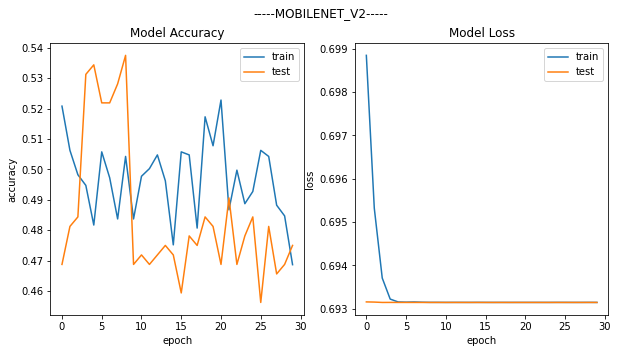

In [9]:
trainer.draw_training_history()

# Saving Trained Model

# Test Trained Model

In [10]:
trainer.test_model()

Testing Trained Model
              precision    recall  f1-score   support

    NON_COMP       0.52      0.97      0.68       221
        COMP       0.54      0.03      0.06       207

    accuracy                           0.52       428
   macro avg       0.53      0.50      0.37       428
weighted avg       0.53      0.52      0.38       428

Model Accuracy: 0.5187


# Evaluate Model

In [11]:
trainer.evaluate_model()

Evaluating model
TEST loss:  0.6931
TEST accuracy:  0.5117


# Vizualize Model Classification

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
../../../notebooks/utils/draw_utils.py:68: VisibleDeprecationWarning: Creating an ndarray 

ValueError: not enough values to unpack (expected 3, got 0)

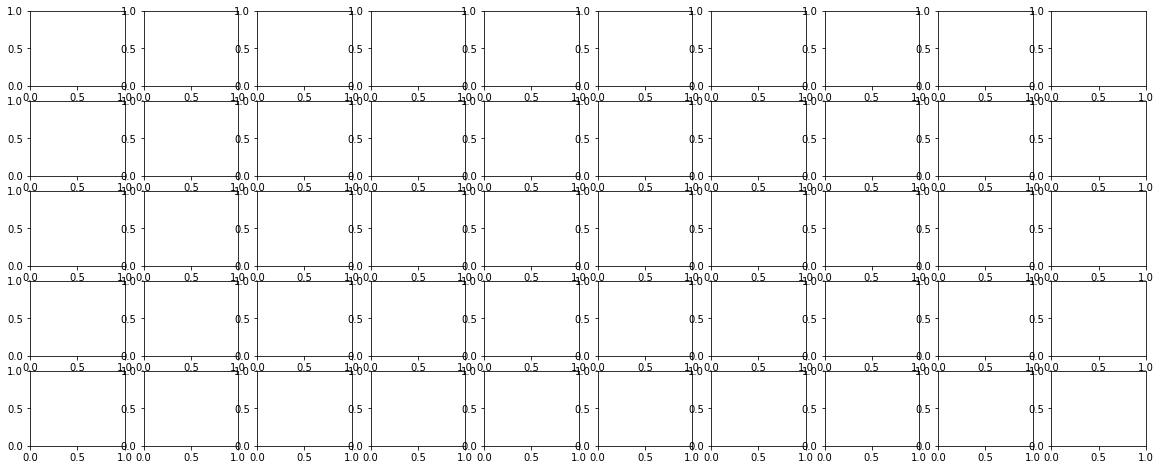

In [12]:
trainer.vizualize_predictions()

# Finishing Experiment Manager

In [ ]:
trainer.finish_experiment()